In [24]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from main import *

# 定义计算序参量的函数
def get_order_parameter(model: ObsAvoid, savePath: str = "./data", ):
    targetPath = f"{savePath}/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    positionX = totalPositionX[-1]
    phaseTheta = totalPhaseTheta[-1]
    N = totalPhaseTheta.shape[1]
    # return (
    #     (np.sum(np.sin(totalPhaseTheta)) / N) ** 2 + 
    #     (np.sum(np.cos(totalPhaseTheta)) / N) ** 2
    # )**0.5
    orderParameter = (
        (np.sum(np.sin(totalPhaseTheta), axis=1) / N) ** 2 + 
        (np.sum(np.cos(totalPhaseTheta), axis=1) / N) ** 2
    )**0.5
    return orderParameter

In [28]:
# 在这里填入你的模型参数，确保之前已经在run.ipynb中运行过你的模型, 即已经保存了模型数据在./data文件夹下
model = ObsAvoid(strengthLambda=5, alpha=1, dt=0.005,
                 savePath="./data", tqdm=True, overWrite=True)

In [39]:
# 调用函数计算模型随时间的序参量变化
op = get_order_parameter(model)

In [40]:
# 查看序参量值
op

array([0.04312063, 0.03974837, 0.04244493, 0.02470674, 0.01737637,
       0.01366343, 0.01555509, 0.01353016, 0.02488684, 0.01031098,
       0.01551377, 0.00069297, 0.02324292, 0.02400948, 0.02036009,
       0.00100415, 0.01236563, 0.03503067, 0.0033578 , 0.02029153,
       0.02558678, 0.00471881, 0.01054483, 0.00961061, 0.02186762,
       0.03036824, 0.04120234, 0.02840922, 0.03466678, 0.00747462,
       0.01103146, 0.03041521, 0.02094815, 0.01014762, 0.06177318,
       0.06741769, 0.04953264, 0.0242291 , 0.03019688, 0.04078159,
       0.02984039, 0.02370852, 0.01279713, 0.0200968 , 0.00761213,
       0.02314191, 0.04839834, 0.00438756, 0.04309437, 0.03795499,
       0.02571825, 0.01862712, 0.04338328, 0.01938518, 0.04091439,
       0.03261769, 0.01772263, 0.06789073, 0.03287008, 0.04160678,
       0.004934  , 0.02433789, 0.02352612, 0.05459794, 0.01129736,
       0.05788488, 0.05096429, 0.02055743, 0.05468948, 0.05555533,
       0.02803671, 0.02547524, 0.05415437, 0.00670054, 0.02069

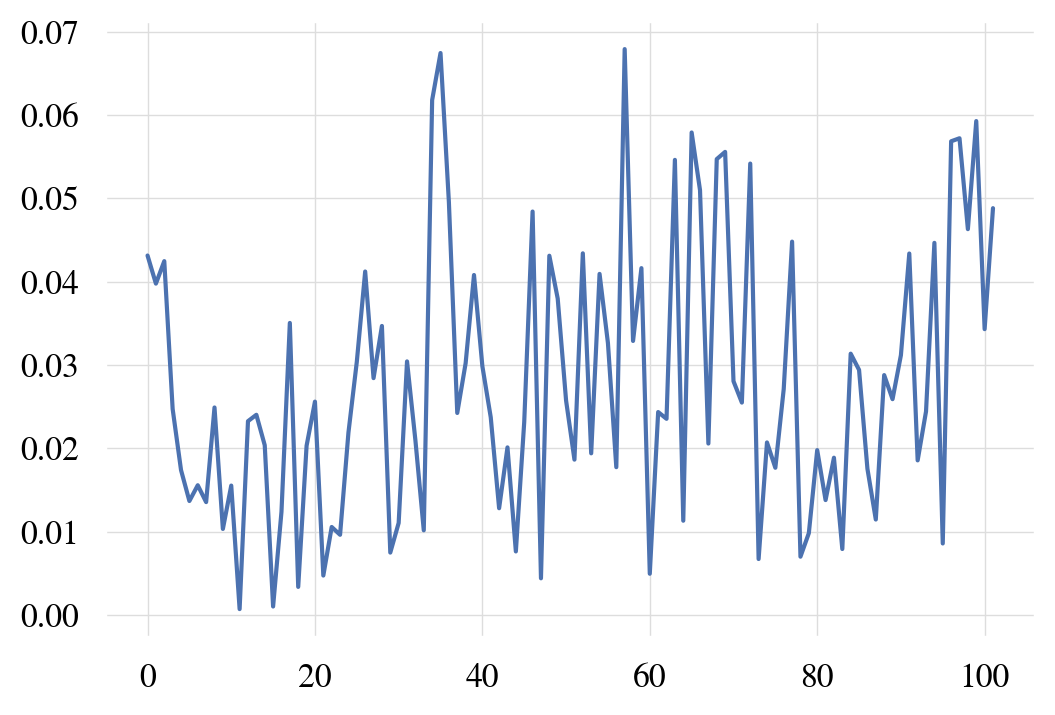

In [42]:
# 画出序参量随时间的变化
plt.figure(figsize=(6, 4))
plt.plot(op)

In [43]:
# 如果需要看终态的值，就看最后一个值
op[-1]

0.04880280587565621